In [1]:
# Importação das bibliotecas
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
import numpy as np
from sklearn.metrics import accuracy_score
from keras.datasets import cifar10

170498071/170498071 [==============================] - 3s 0us/step


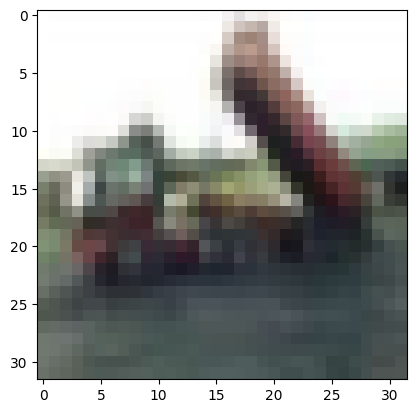

In [3]:
# Obtenção dos dados e divisão automática entre treinamento e teste
(X_treinamento, y_treinamento), (X_teste, y_teste) = cifar10.load_data()
# Visualização de imagens específicas
plt.imshow(X_treinamento[2], cmap = 'gray')

In [4]:
X_treinamento.shape

(50000, 32, 32, 3)

In [5]:
X_teste.shape

(10000, 32, 32, 3)

In [6]:
X_treinamento.shape[1:]

(32, 32, 3)

In [7]:
len(X_treinamento)

50000

In [8]:
np.prod(X_treinamento.shape[1:])

3072

In [9]:
# Transformação dos dados para float para podermos normalizar os dados
X_treinamento = X_treinamento.astype('float32')
X_teste = X_teste.astype('float32')

In [10]:
# Normalização (255 é o valor máximo de um pixel)
X_treinamento /= 255
X_teste /= 255

In [11]:
# Transformação para o formato dummy (temos 10 classes)
y_treinamento = np_utils.to_categorical(y_treinamento, 10)
y_teste = np_utils.to_categorical(y_teste, 10)
y_teste[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [18]:
modelo = Sequential()
modelo.add(Conv2D(32, (5,5), activation='relu', padding='same', input_shape=(32, 32,3)))
modelo.add(MaxPooling2D(pool_size=(2,2)))
modelo.add(Dropout(0.25))
modelo.add(Flatten())
modelo.add(Dense(128, activation='relu'))
modelo.add(Dropout(0.5))
modelo.add(Dense(10, activation='softmax'))

In [16]:
# Visualização da estrutura da rede neural
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        2432      
                                                                 
Total params: 2,432
Trainable params: 2,432
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Configuração dos parâmetros da rede neural e treinamento (utilizando base de dados de validação)
# Na variável historico temos os histórico das execuções (erro e accuracy)
modelo.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
               metrics = ['accuracy'])
historico = modelo.fit(X_treinamento, y_treinamento, epochs = 5,
                       validation_data = (X_teste, y_teste))

Epoch 1/5
1563/1563 [==============================] - 87s 55ms/step - loss: 1.6815 - accuracy: 0.3888 - val_loss: 1.3841 - val_accuracy: 0.5082
Epoch 2/5
1563/1563 [==============================] - 87s 56ms/step - loss: 1.4444 - accuracy: 0.4805 - val_loss: 1.2275 - val_accuracy: 0.5634
Epoch 3/5
1563/1563 [==============================] - 87s 55ms/step - loss: 1.3490 - accuracy: 0.5143 - val_loss: 1.1800 - val_accuracy: 0.5884
Epoch 4/5
1563/1563 [==============================] - 86s 55ms/step - loss: 1.2900 - accuracy: 0.5395 - val_loss: 1.1462 - val_accuracy: 0.6012
Epoch 5/5
1563/1563 [==============================] - 87s 56ms/step - loss: 1.2563 - accuracy: 0.5482 - val_loss: 1.1185 - val_accuracy: 0.6065


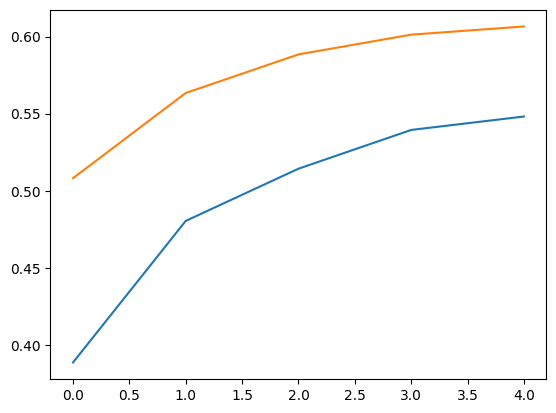

In [20]:
# Gráfico para visualizar os erros e accuracy
historico.history.keys()
#evolução do erro, azul
plt.plot(historico.history['accuracy'])
#performance da rede
plt.plot(historico.history['val_accuracy'])

In [21]:
# Obtenção das previsões 
y_pred = modelo.predict(X_teste)
y_pred = (y_pred > 0.5).astype(int)

313/313 [==============================] - 4s 13ms/step


In [23]:
accuracy_score(y_teste,y_pred)

0.4045

In [29]:
modelo2 = Sequential()
modelo2.add(Conv2D(64, (5,5), activation='relu', padding='same'))
modelo2.add(MaxPooling2D(pool_size=(2,2)))
modelo2.add(Dropout(0.25))
modelo2.add(Flatten())
modelo2.add(Dense(128, activation='relu'))
modelo2.add(Dropout(0.5))
modelo2.add(Dense(10, activation='softmax'))

In [31]:
# Configuração dos parâmetros da rede neural e treinamento (utilizando base de dados de validação)
# Na variável historico temos os histórico das execuções (erro e accuracy)
modelo2.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
               metrics = ['accuracy'])
historico = modelo2.fit(X_treinamento, y_treinamento, epochs = 5,
                       validation_data = (X_teste, y_teste))

Epoch 1/5
1563/1563 [==============================] - 140s 89ms/step - loss: 1.6593 - accuracy: 0.3983 - val_loss: 1.3217 - val_accuracy: 0.5304
Epoch 2/5
1563/1563 [==============================] - 134s 86ms/step - loss: 1.4187 - accuracy: 0.4905 - val_loss: 1.2741 - val_accuracy: 0.5456
Epoch 3/5
1563/1563 [==============================] - 131s 84ms/step - loss: 1.3177 - accuracy: 0.5290 - val_loss: 1.2187 - val_accuracy: 0.5832
Epoch 4/5
1563/1563 [==============================] - 134s 86ms/step - loss: 1.2593 - accuracy: 0.5483 - val_loss: 1.1629 - val_accuracy: 0.5960
Epoch 5/5
1563/1563 [==============================] - 145s 92ms/step - loss: 1.2142 - accuracy: 0.5665 - val_loss: 1.0775 - val_accuracy: 0.6216


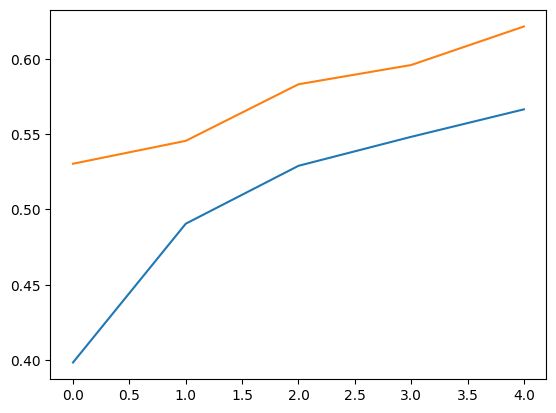

In [32]:
# Gráfico para visualizar os erros e accuracy
historico.history.keys()
#evolução do erro, azul
plt.plot(historico.history['accuracy'])
#performance da rede
plt.plot(historico.history['val_accuracy'])

In [38]:
# Obtenção das previsões 
y_pred = modelo2.predict(X_teste)
y_pred = (y_pred > 0.5).astype(int)

313/313 [==============================] - 7s 22ms/step


In [39]:
accuracy_score(y_teste,y_pred)

0.4169